In [13]:
import numpy as np
import keras

In [14]:
# Import mnist dataset and rescale between [0,1]
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape)
print(np.max(X_train[0]))
print(y_train[0])

1.0
5


In [4]:
from keras.models import Model
from keras.layers import Input, Flatten, Dense

print('Linear model')
images = Input(batch_shape=(None, 28, 28), dtype='float32', name='Images') 
flat = Flatten(name='Flat image')(images)
output = Dense(10, activation='softmax', name='Dense output')(flat)

# Model Architecture defined
model_linear = Model(input=images, output=output)
model_linear.summary()


Linear model
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Images (InputLayer)              (None, 28, 28)        0                                            
____________________________________________________________________________________________________
Flat image (Flatten)             (None, 784)           0           Images[0][0]                     
____________________________________________________________________________________________________
Dense output (Dense)             (None, 10)            7850        Flat image[0][0]                 
Total params: 7850
____________________________________________________________________________________________________


In [5]:
# Compile model and select optimizer
from keras.optimizers import sgd

sgd_optimizer = sgd(lr=0.01)
model_linear.compile(loss='sparse_categorical_crossentropy', 
                     optimizer=sgd_optimizer, metrics=['accuracy'])


In [6]:
# Train the model
batch_size = 256
nb_epoch = 30

history = model_linear.fit(X_train, y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 0s - loss: 1.5827 - acc: 0.6098 - val_loss: 1.1098 - val_acc: 0.7886
Epoch 2/30
60000/60000 [==============================] - 0s - loss: 0.9538 - acc: 0.8103 - val_loss: 0.8062 - val_acc: 0.8351
Epoch 3/30
60000/60000 [==============================] - 0s - loss: 0.7584 - acc: 0.8362 - val_loss: 0.6777 - val_acc: 0.8535
Epoch 4/30
60000/60000 [==============================] - 0s - loss: 0.6623 - acc: 0.8484 - val_loss: 0.6050 - val_acc: 0.8647
Epoch 5/30
60000/60000 [==============================] - 0s - loss: 0.6038 - acc: 0.8571 - val_loss: 0.5578 - val_acc: 0.8713
Epoch 6/30
60000/60000 [==============================] - 0s - loss: 0.5638 - acc: 0.8627 - val_loss: 0.5240 - val_acc: 0.8755
Epoch 7/30
60000/60000 [==============================] - 0s - loss: 0.5344 - acc: 0.8675 - val_loss: 0.4985 - val_acc: 0.8795
Epoch 8/30
60000/60000 [==============================] - 0s 

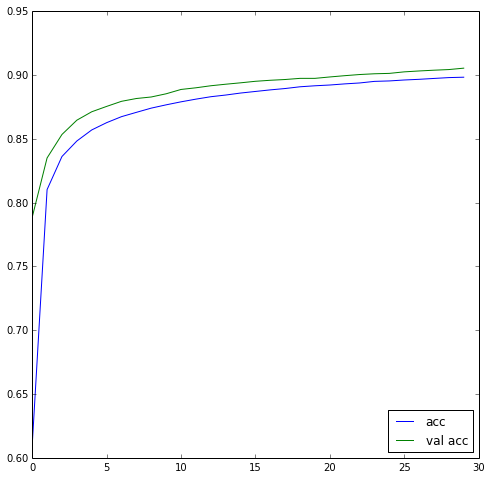

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 8)

plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend(loc='lower right')
plt.show()

In [8]:
## Convolutional model

from keras.models import Model
from keras.layers import Input, Flatten, Dense, Convolution2D, Reshape, MaxPooling2D, Dropout
from keras.optimizers import sgd

print('Linear model')
images = Input(batch_shape=(None, 28, 28), dtype='float32', name='Images') 
images_reshaped = Reshape((1,28,28))(images)

#First convolution layers stack
conv1 = Convolution2D(20, 5, 5)(images_reshaped)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

#Second convolution layers stack
conv2 = Convolution2D(50, 5, 5)(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

#Flatten and dense layers
flat = Flatten(name='Flat image')(pool2)
dense1 = Dense(500, activation='relu', name='Dense 1')(flat)

output = Dense(10, activation='softmax', name='Dense output')(dense1)

# Model Architecture defined
model_conv = Model(input=images, output=output)
model_conv.summary()


Linear model
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Images (InputLayer)              (None, 28, 28)        0                                            
____________________________________________________________________________________________________
reshape_1 (Reshape)              (None, 1, 28, 28)     0           Images[0][0]                     
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 20, 24, 24)    520         reshape_1[0][0]                  
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 20, 12, 12)    0           convolution2d_1[0][0]            
______________________________________________________________________________

In [9]:
# Compile model and select optimizer
sgd_optimizer = sgd(lr=0.01, momentum=0.99, decay=0.005, nesterov=True)
model_conv.compile(loss='sparse_categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])


In [10]:
# Train the model
batch_size = 256
nb_epoch = 30
history = model_conv.fit(X_train, y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s - loss: 0.4263 - acc: 0.8892 - val_loss: 0.0974 - val_acc: 0.9715
Epoch 2/30
60000/60000 [==============================] - 2s - loss: 0.0729 - acc: 0.9788 - val_loss: 0.0496 - val_acc: 0.9851
Epoch 3/30
60000/60000 [==============================] - 2s - loss: 0.0360 - acc: 0.9897 - val_loss: 0.0378 - val_acc: 0.9885
Epoch 4/30
60000/60000 [==============================] - 2s - loss: 0.0233 - acc: 0.9927 - val_loss: 0.0374 - val_acc: 0.9884
Epoch 5/30
60000/60000 [==============================] - 2s - loss: 0.0162 - acc: 0.9954 - val_loss: 0.0343 - val_acc: 0.9892
Epoch 6/30
60000/60000 [==============================] - 2s - loss: 0.0124 - acc: 0.9968 - val_loss: 0.0354 - val_acc: 0.9889
Epoch 7/30
60000/60000 [==============================] - 3s - loss: 0.0105 - acc: 0.9975 - val_loss: 0.0362 - val_acc: 0.9892
Epoch 8/30
60000/60000 [==============================] - 2s 

In [11]:
# Score and select prediction with max prob
import numpy as np
pred_test = np.argmax(model_conv.predict(X_test), axis=1)

#Evaluate the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_test))

[[ 972    0    1    0    0    0    1    2    3    1]
 [   0 1128    1    1    0    0    1    2    2    0]
 [   2    0 1019    1    1    0    1    4    4    0]
 [   0    0    1 1000    0    4    0    1    2    2]
 [   0    0    0    0  972    0    2    1    0    7]
 [   2    0    0    6    0  881    1    1    1    0]
 [   2    2    0    0    1    2  950    0    1    0]
 [   0    2    4    1    0    0    0 1015    1    5]
 [   2    0    2    1    0    1    0    0  964    4]
 [   0    0    0    3    7    2    0    3    2  992]]
